In [1]:
from keras.models import Sequential
from keras.layers.core import Flatten, Dense, Dropout
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.optimizers import SGD
import numpy as np
     

Using TensorFlow backend.


In [2]:
from keras.datasets import cifar10

In [3]:
# The data, shuffled and split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')


170467328/170498071 [============================>.] - ETA: 0sx_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [13]:
# checking the number of unique classes
len(np.unique(y_train))


10

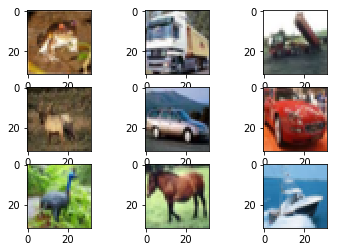

In [16]:
#display few images
from matplotlib import pyplot
from scipy.misc import toimage


for i in range(0, 9):
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(toimage(x_train[i]))
# show the plot
pyplot.show()

In [17]:
# Normalize the x - values. Since the values are integers, cast the values to float before normalizing
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255.0
x_test = x_test / 255.0

In [20]:
# one hot encode the target so that multi-classification can be done using softmax
from keras.utils import np_utils

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [21]:
num_classes

10

In [27]:
#a)	Convolutional input layer, 32 feature maps with a size of 3×3, a rectifier activation function and 
#a weight constraint of max norm set to 3.

# changing the backend so that the image ordering is done as per the theano ( input shape is depth,width,height)
from keras import backend as K
#K.set_image_dim_ordering('th')

from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D

# Create the model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), padding='same', activation='relu', kernel_constraint=maxnorm(3)))

#b)	Dropout set to 20%.

model.add(Dropout(0.2))

#c)	Convolutional layer, 32 feature maps with a size of 3×3, 
#a rectifier activation function and a weight constraint of max norm set to 3.
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))

#d)	Max Pool layer with size 2×2.
model.add(MaxPooling2D(pool_size=(2, 2)))

#e)	Flatten layer.

model.add(Flatten())

#f)	Fully connected layer with 512 units and a rectifier activation function.
model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))

#g)	Dropout set to 50%.
model.add(Dropout(0.5))

#h)	Fully connected output layer with 10 units and a softmax activation function.
model.add(Dense(num_classes, activation='softmax'))

# Compile model
epochs = 2
lrate = 0.01

# decayed learning rate
decay = lrate/epochs

# Using stochastic gradient descent
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)

# categorical cross entropy for multi-classification 
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(model.summary())


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 3)         9248      
_________________________________________________________________
dropout_3 (Dropout)          (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 3)         9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 16, 1)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
__________

In [28]:
# Fit the model
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epochs, batch_size=32)
# Final evaluation of the model
scores = model.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Train on 50000 samples, validate on 10000 samples
Epoch 1/2
50000/50000 [==============================] - 141s - loss: 1.9114 - acc: 0.3004 - val_loss: 1.7312 - val_acc: 0.3883
Epoch 2/2
50000/50000 [==============================] - 135s - loss: 1.7318 - acc: 0.3789 - val_loss: 1.6544 - val_acc: 0.4136
Accuracy: 41.36%
